## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  89.979480  1454.388199  0.448031  7.762003  1.176258
1   2.440989   669.393298  0.591009  2.595968  1.596031
2  38.821848   941.733713  0.060783  9.216220  0.916467
3  18.013918  1272.876988  0.268099  4.051269  1.469215
4  70.799285  1506.643550  0.008826  5.458795  0.324815


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.001),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.34684 | train_mse: 5.143   | train_mae: 1.74747 |  0:00:00s
epoch 1  | loss: 1.1295  | train_mse: 3.82114 | train_mae: 1.54411 |  0:00:00s
epoch 2  | loss: 1.10329 | train_mse: 3.16973 | train_mae: 1.43867 |  0:00:00s


epoch 3  | loss: 0.92973 | train_mse: 2.71913 | train_mae: 1.31926 |  0:00:00s
epoch 4  | loss: 0.92162 | train_mse: 2.24186 | train_mae: 1.19485 |  0:00:00s
epoch 5  | loss: 1.13277 | train_mse: 1.82215 | train_mae: 1.08932 |  0:00:00s


epoch 6  | loss: 0.80151 | train_mse: 1.559   | train_mae: 1.00656 |  0:00:00s
epoch 7  | loss: 0.82213 | train_mse: 1.42839 | train_mae: 0.95212 |  0:00:00s
epoch 8  | loss: 0.91141 | train_mse: 1.31489 | train_mae: 0.90794 |  0:00:01s


epoch 9  | loss: 0.81837 | train_mse: 1.18666 | train_mae: 0.84986 |  0:00:01s
epoch 10 | loss: 0.80547 | train_mse: 1.11549 | train_mae: 0.83032 |  0:00:01s
epoch 11 | loss: 0.73147 | train_mse: 1.06859 | train_mae: 0.81323 |  0:00:01s


epoch 12 | loss: 0.79189 | train_mse: 1.06624 | train_mae: 0.80449 |  0:00:01s
epoch 13 | loss: 0.80253 | train_mse: 0.94071 | train_mae: 0.75033 |  0:00:01s
epoch 14 | loss: 0.73245 | train_mse: 0.90221 | train_mae: 0.73747 |  0:00:01s


epoch 15 | loss: 0.71602 | train_mse: 0.84648 | train_mae: 0.7152  |  0:00:01s
epoch 16 | loss: 0.71849 | train_mse: 0.80227 | train_mae: 0.69748 |  0:00:01s


epoch 17 | loss: 0.71796 | train_mse: 0.7606  | train_mae: 0.68071 |  0:00:01s
epoch 18 | loss: 0.62998 | train_mse: 0.74862 | train_mae: 0.67425 |  0:00:02s
epoch 19 | loss: 0.68838 | train_mse: 0.71315 | train_mae: 0.65792 |  0:00:02s


epoch 20 | loss: 0.7568  | train_mse: 0.68548 | train_mae: 0.64231 |  0:00:02s
epoch 21 | loss: 0.60193 | train_mse: 0.6605  | train_mae: 0.63113 |  0:00:02s
epoch 22 | loss: 0.74009 | train_mse: 0.63822 | train_mae: 0.61892 |  0:00:02s


epoch 23 | loss: 0.54901 | train_mse: 0.61943 | train_mae: 0.60783 |  0:00:02s
epoch 24 | loss: 0.60818 | train_mse: 0.60354 | train_mae: 0.59894 |  0:00:02s
epoch 25 | loss: 0.55765 | train_mse: 0.58956 | train_mae: 0.59398 |  0:00:02s


epoch 26 | loss: 0.5561  | train_mse: 0.5697  | train_mae: 0.58639 |  0:00:02s
epoch 27 | loss: 0.50233 | train_mse: 0.56169 | train_mae: 0.58343 |  0:00:02s


epoch 28 | loss: 0.68916 | train_mse: 0.54147 | train_mae: 0.57174 |  0:00:02s
epoch 29 | loss: 0.52921 | train_mse: 0.5239  | train_mae: 0.56028 |  0:00:03s
epoch 30 | loss: 0.47673 | train_mse: 0.50942 | train_mae: 0.54746 |  0:00:03s


epoch 31 | loss: 0.86578 | train_mse: 0.50149 | train_mae: 0.5373  |  0:00:03s
epoch 32 | loss: 0.51932 | train_mse: 0.49001 | train_mae: 0.53106 |  0:00:03s
epoch 33 | loss: 0.45498 | train_mse: 0.46738 | train_mae: 0.51675 |  0:00:03s


epoch 34 | loss: 0.59663 | train_mse: 0.43741 | train_mae: 0.49721 |  0:00:03s
epoch 35 | loss: 0.59574 | train_mse: 0.42643 | train_mae: 0.4857  |  0:00:03s
epoch 36 | loss: 0.49058 | train_mse: 0.42574 | train_mae: 0.48098 |  0:00:03s


epoch 37 | loss: 0.61219 | train_mse: 0.41603 | train_mae: 0.4737  |  0:00:03s
epoch 38 | loss: 0.51504 | train_mse: 0.40407 | train_mae: 0.46721 |  0:00:03s
epoch 39 | loss: 0.45116 | train_mse: 0.38818 | train_mae: 0.45519 |  0:00:03s


epoch 40 | loss: 0.43239 | train_mse: 0.37005 | train_mae: 0.44471 |  0:00:04s
epoch 41 | loss: 0.48773 | train_mse: 0.35806 | train_mae: 0.44148 |  0:00:04s
epoch 42 | loss: 0.3297  | train_mse: 0.34085 | train_mae: 0.43464 |  0:00:04s


epoch 43 | loss: 0.38025 | train_mse: 0.33285 | train_mae: 0.43048 |  0:00:04s
epoch 44 | loss: 0.40978 | train_mse: 0.32321 | train_mae: 0.42189 |  0:00:04s


epoch 45 | loss: 0.36356 | train_mse: 0.31057 | train_mae: 0.41503 |  0:00:04s
epoch 46 | loss: 0.40633 | train_mse: 0.30181 | train_mae: 0.41118 |  0:00:04s


epoch 47 | loss: 0.40024 | train_mse: 0.29156 | train_mae: 0.40413 |  0:00:04s
epoch 48 | loss: 0.44573 | train_mse: 0.2773  | train_mae: 0.39623 |  0:00:05s


epoch 49 | loss: 0.32517 | train_mse: 0.26378 | train_mae: 0.38936 |  0:00:05s
epoch 50 | loss: 0.35802 | train_mse: 0.24671 | train_mae: 0.38174 |  0:00:05s


epoch 51 | loss: 0.38582 | train_mse: 0.2352  | train_mae: 0.37468 |  0:00:05s
epoch 52 | loss: 0.26421 | train_mse: 0.23432 | train_mae: 0.37498 |  0:00:05s


epoch 53 | loss: 0.27687 | train_mse: 0.23473 | train_mae: 0.37121 |  0:00:05s
epoch 54 | loss: 0.35526 | train_mse: 0.22757 | train_mae: 0.36442 |  0:00:05s


epoch 55 | loss: 0.31546 | train_mse: 0.21914 | train_mae: 0.3597  |  0:00:05s
epoch 56 | loss: 0.39503 | train_mse: 0.21301 | train_mae: 0.35713 |  0:00:06s


epoch 57 | loss: 0.53653 | train_mse: 0.20892 | train_mae: 0.35406 |  0:00:06s
epoch 58 | loss: 0.37987 | train_mse: 0.20326 | train_mae: 0.34861 |  0:00:06s


epoch 59 | loss: 0.3519  | train_mse: 0.21202 | train_mae: 0.35712 |  0:00:06s
epoch 60 | loss: 0.62944 | train_mse: 0.19739 | train_mae: 0.34694 |  0:00:06s


epoch 61 | loss: 0.4354  | train_mse: 0.19627 | train_mae: 0.34308 |  0:00:06s
epoch 62 | loss: 0.32421 | train_mse: 0.19708 | train_mae: 0.34344 |  0:00:06s


epoch 63 | loss: 0.33836 | train_mse: 0.20561 | train_mae: 0.34723 |  0:00:07s
epoch 64 | loss: 0.37304 | train_mse: 0.20364 | train_mae: 0.34521 |  0:00:07s


epoch 65 | loss: 0.60384 | train_mse: 0.1996  | train_mae: 0.34108 |  0:00:07s
epoch 66 | loss: 0.3791  | train_mse: 0.19129 | train_mae: 0.33533 |  0:00:07s


epoch 67 | loss: 0.32933 | train_mse: 0.19412 | train_mae: 0.3359  |  0:00:07s
epoch 68 | loss: 0.47726 | train_mse: 0.19361 | train_mae: 0.33321 |  0:00:07s


epoch 69 | loss: 0.24343 | train_mse: 0.19738 | train_mae: 0.33643 |  0:00:07s
epoch 70 | loss: 0.33815 | train_mse: 0.20223 | train_mae: 0.33963 |  0:00:07s


epoch 71 | loss: 0.39852 | train_mse: 0.20063 | train_mae: 0.3375  |  0:00:07s
epoch 72 | loss: 0.23779 | train_mse: 0.19208 | train_mae: 0.33234 |  0:00:08s


epoch 73 | loss: 0.42146 | train_mse: 0.18741 | train_mae: 0.3306  |  0:00:08s
epoch 74 | loss: 0.37659 | train_mse: 0.18304 | train_mae: 0.33267 |  0:00:08s
epoch 75 | loss: 0.31776 | train_mse: 0.1841  | train_mae: 0.3368  |  0:00:08s


epoch 76 | loss: 0.27906 | train_mse: 0.18206 | train_mae: 0.33207 |  0:00:08s
epoch 77 | loss: 0.25666 | train_mse: 0.18484 | train_mae: 0.33249 |  0:00:08s
epoch 78 | loss: 0.3724  | train_mse: 0.19711 | train_mae: 0.33912 |  0:00:08s


epoch 79 | loss: 0.57023 | train_mse: 0.21213 | train_mae: 0.34515 |  0:00:08s
epoch 80 | loss: 0.34969 | train_mse: 0.2265  | train_mae: 0.3537  |  0:00:08s
epoch 81 | loss: 0.2529  | train_mse: 0.23029 | train_mae: 0.35539 |  0:00:08s


epoch 82 | loss: 0.64564 | train_mse: 0.23887 | train_mae: 0.35583 |  0:00:09s
epoch 83 | loss: 0.3592  | train_mse: 0.23369 | train_mae: 0.35437 |  0:00:09s
epoch 84 | loss: 0.31226 | train_mse: 0.22458 | train_mae: 0.34507 |  0:00:09s


epoch 85 | loss: 0.3957  | train_mse: 0.21895 | train_mae: 0.34504 |  0:00:09s
epoch 86 | loss: 0.31333 | train_mse: 0.21117 | train_mae: 0.3438  |  0:00:09s
epoch 87 | loss: 0.29692 | train_mse: 0.20888 | train_mae: 0.34833 |  0:00:09s


epoch 88 | loss: 0.2768  | train_mse: 0.20864 | train_mae: 0.34736 |  0:00:09s
epoch 89 | loss: 0.236   | train_mse: 0.20979 | train_mae: 0.34756 |  0:00:09s
epoch 90 | loss: 0.31976 | train_mse: 0.20341 | train_mae: 0.34567 |  0:00:09s


epoch 91 | loss: 0.42761 | train_mse: 0.21069 | train_mae: 0.35143 |  0:00:09s
epoch 92 | loss: 0.3505  | train_mse: 0.20948 | train_mae: 0.35288 |  0:00:09s
epoch 93 | loss: 0.44931 | train_mse: 0.19913 | train_mae: 0.34477 |  0:00:09s


epoch 94 | loss: 0.33576 | train_mse: 0.21947 | train_mae: 0.34845 |  0:00:10s
epoch 95 | loss: 0.33305 | train_mse: 0.21882 | train_mae: 0.35071 |  0:00:10s
epoch 96 | loss: 0.17313 | train_mse: 0.20907 | train_mae: 0.34725 |  0:00:10s


epoch 97 | loss: 0.33774 | train_mse: 0.20261 | train_mae: 0.34212 |  0:00:10s
epoch 98 | loss: 0.35177 | train_mse: 0.201   | train_mae: 0.33955 |  0:00:10s
epoch 99 | loss: 0.39189 | train_mse: 0.19813 | train_mae: 0.33617 |  0:00:10s


epoch 100| loss: 0.56491 | train_mse: 0.19528 | train_mae: 0.33279 |  0:00:10s
epoch 101| loss: 0.45889 | train_mse: 0.19693 | train_mae: 0.33384 |  0:00:10s
epoch 102| loss: 0.3699  | train_mse: 0.19645 | train_mae: 0.33346 |  0:00:10s


epoch 103| loss: 0.23936 | train_mse: 0.19718 | train_mae: 0.33239 |  0:00:10s
epoch 104| loss: 0.27532 | train_mse: 0.19104 | train_mae: 0.32764 |  0:00:10s
epoch 105| loss: 0.26857 | train_mse: 0.18743 | train_mae: 0.32829 |  0:00:10s


epoch 106| loss: 0.27248 | train_mse: 0.18752 | train_mae: 0.33049 |  0:00:11s
epoch 107| loss: 0.29125 | train_mse: 0.2647  | train_mae: 0.35111 |  0:00:11s
epoch 108| loss: 0.43233 | train_mse: 0.2675  | train_mae: 0.34911 |  0:00:11s


epoch 109| loss: 0.35534 | train_mse: 0.20123 | train_mae: 0.32265 |  0:00:11s
epoch 110| loss: 0.41563 | train_mse: 0.16634 | train_mae: 0.31241 |  0:00:11s
epoch 111| loss: 0.27103 | train_mse: 0.17163 | train_mae: 0.31561 |  0:00:11s


epoch 112| loss: 0.28455 | train_mse: 0.20817 | train_mae: 0.32613 |  0:00:11s
epoch 113| loss: 0.39706 | train_mse: 0.21933 | train_mae: 0.32306 |  0:00:11s
epoch 114| loss: 0.40736 | train_mse: 0.23003 | train_mae: 0.33292 |  0:00:11s


epoch 115| loss: 0.46246 | train_mse: 0.23153 | train_mae: 0.33616 |  0:00:11s
epoch 116| loss: 0.3229  | train_mse: 0.222   | train_mae: 0.33397 |  0:00:11s
epoch 117| loss: 0.33788 | train_mse: 0.22137 | train_mae: 0.33407 |  0:00:12s


epoch 118| loss: 0.35639 | train_mse: 0.21627 | train_mae: 0.32738 |  0:00:12s
epoch 119| loss: 0.38852 | train_mse: 0.2208  | train_mae: 0.3343  |  0:00:12s
epoch 120| loss: 0.26867 | train_mse: 0.2156  | train_mae: 0.33381 |  0:00:12s


epoch 121| loss: 0.2978  | train_mse: 0.21554 | train_mae: 0.33409 |  0:00:12s
epoch 122| loss: 0.3627  | train_mse: 0.21298 | train_mae: 0.33255 |  0:00:12s
epoch 123| loss: 0.43912 | train_mse: 0.20389 | train_mae: 0.32499 |  0:00:12s


epoch 124| loss: 0.34324 | train_mse: 0.16551 | train_mae: 0.30629 |  0:00:12s
epoch 125| loss: 0.39893 | train_mse: 0.1484  | train_mae: 0.29518 |  0:00:12s
epoch 126| loss: 0.2088  | train_mse: 0.14956 | train_mae: 0.29712 |  0:00:12s


epoch 127| loss: 0.39934 | train_mse: 0.15229 | train_mae: 0.29969 |  0:00:12s
epoch 128| loss: 0.37038 | train_mse: 0.15228 | train_mae: 0.30118 |  0:00:12s
epoch 129| loss: 0.3061  | train_mse: 0.15267 | train_mae: 0.30218 |  0:00:13s


epoch 130| loss: 0.26121 | train_mse: 0.15479 | train_mae: 0.30276 |  0:00:13s
epoch 131| loss: 0.39579 | train_mse: 0.18285 | train_mae: 0.31191 |  0:00:13s
epoch 132| loss: 0.24886 | train_mse: 0.1663  | train_mae: 0.30419 |  0:00:13s


epoch 133| loss: 0.42159 | train_mse: 0.16966 | train_mae: 0.30685 |  0:00:13s
epoch 134| loss: 0.24776 | train_mse: 0.16131 | train_mae: 0.30258 |  0:00:13s
epoch 135| loss: 0.32861 | train_mse: 0.15533 | train_mae: 0.30432 |  0:00:13s


epoch 136| loss: 0.29209 | train_mse: 0.14721 | train_mae: 0.29714 |  0:00:13s
epoch 137| loss: 0.30599 | train_mse: 0.14588 | train_mae: 0.29335 |  0:00:13s
epoch 138| loss: 0.54123 | train_mse: 0.15467 | train_mae: 0.30301 |  0:00:13s


epoch 139| loss: 0.39533 | train_mse: 0.15977 | train_mae: 0.30922 |  0:00:13s
epoch 140| loss: 0.25017 | train_mse: 0.16144 | train_mae: 0.31008 |  0:00:13s
epoch 141| loss: 0.30302 | train_mse: 0.16005 | train_mae: 0.3094  |  0:00:14s


epoch 142| loss: 0.24225 | train_mse: 0.15943 | train_mae: 0.31125 |  0:00:14s
epoch 143| loss: 0.32175 | train_mse: 0.16495 | train_mae: 0.31213 |  0:00:14s
epoch 144| loss: 0.19516 | train_mse: 0.16461 | train_mae: 0.31059 |  0:00:14s


epoch 145| loss: 0.20105 | train_mse: 0.15455 | train_mae: 0.30016 |  0:00:14s
epoch 146| loss: 0.30219 | train_mse: 0.15116 | train_mae: 0.2913  |  0:00:14s
epoch 147| loss: 0.20922 | train_mse: 0.14939 | train_mae: 0.28762 |  0:00:14s


epoch 148| loss: 0.32267 | train_mse: 0.1459  | train_mae: 0.27928 |  0:00:14s
epoch 149| loss: 0.34401 | train_mse: 0.14343 | train_mae: 0.28428 |  0:00:14s
epoch 150| loss: 0.51759 | train_mse: 0.14072 | train_mae: 0.28073 |  0:00:14s


epoch 151| loss: 0.33678 | train_mse: 0.15643 | train_mae: 0.28422 |  0:00:14s
epoch 152| loss: 0.54072 | train_mse: 0.15518 | train_mae: 0.28364 |  0:00:15s
epoch 153| loss: 0.28417 | train_mse: 0.15584 | train_mae: 0.28679 |  0:00:15s


epoch 154| loss: 0.34015 | train_mse: 0.14018 | train_mae: 0.27634 |  0:00:15s
epoch 155| loss: 0.28357 | train_mse: 0.1412  | train_mae: 0.276   |  0:00:15s
epoch 156| loss: 0.28355 | train_mse: 0.13914 | train_mae: 0.27248 |  0:00:15s


epoch 157| loss: 0.31736 | train_mse: 0.143   | train_mae: 0.27072 |  0:00:15s
epoch 158| loss: 0.40752 | train_mse: 0.14547 | train_mae: 0.27299 |  0:00:15s
epoch 159| loss: 0.22498 | train_mse: 0.14099 | train_mae: 0.27167 |  0:00:15s


epoch 160| loss: 0.22601 | train_mse: 0.1389  | train_mae: 0.27469 |  0:00:15s
epoch 161| loss: 0.28835 | train_mse: 0.14068 | train_mae: 0.2779  |  0:00:15s
epoch 162| loss: 0.23476 | train_mse: 0.14552 | train_mae: 0.28049 |  0:00:15s


epoch 163| loss: 0.2799  | train_mse: 0.14689 | train_mae: 0.28558 |  0:00:16s
epoch 164| loss: 0.25457 | train_mse: 0.16068 | train_mae: 0.29902 |  0:00:16s
epoch 165| loss: 0.27533 | train_mse: 0.16759 | train_mae: 0.30609 |  0:00:16s


epoch 166| loss: 0.1871  | train_mse: 0.16867 | train_mae: 0.30507 |  0:00:16s
epoch 167| loss: 0.3401  | train_mse: 0.16706 | train_mae: 0.30404 |  0:00:16s
epoch 168| loss: 0.44735 | train_mse: 0.16384 | train_mae: 0.30255 |  0:00:16s


epoch 169| loss: 0.4567  | train_mse: 0.16192 | train_mae: 0.30145 |  0:00:16s
epoch 170| loss: 0.19685 | train_mse: 0.15711 | train_mae: 0.29871 |  0:00:16s
epoch 171| loss: 0.30569 | train_mse: 0.15468 | train_mae: 0.29704 |  0:00:16s


epoch 172| loss: 0.28605 | train_mse: 0.15732 | train_mae: 0.3005  |  0:00:16s
epoch 173| loss: 0.33634 | train_mse: 0.15642 | train_mae: 0.30343 |  0:00:16s
epoch 174| loss: 0.41438 | train_mse: 0.15566 | train_mae: 0.30461 |  0:00:16s


epoch 175| loss: 0.46217 | train_mse: 0.1531  | train_mae: 0.30355 |  0:00:17s
epoch 176| loss: 0.33147 | train_mse: 0.15109 | train_mae: 0.30234 |  0:00:17s
epoch 177| loss: 0.31231 | train_mse: 0.14801 | train_mae: 0.29997 |  0:00:17s


epoch 178| loss: 0.26416 | train_mse: 0.14257 | train_mae: 0.29337 |  0:00:17s
epoch 179| loss: 0.28313 | train_mse: 0.13617 | train_mae: 0.28658 |  0:00:17s


epoch 180| loss: 0.38653 | train_mse: 0.13358 | train_mae: 0.28205 |  0:00:17s
epoch 181| loss: 0.31635 | train_mse: 0.13391 | train_mae: 0.2797  |  0:00:17s


epoch 182| loss: 0.27846 | train_mse: 0.13364 | train_mae: 0.27763 |  0:00:17s
epoch 183| loss: 0.23835 | train_mse: 0.1328  | train_mae: 0.27631 |  0:00:17s
epoch 184| loss: 0.21204 | train_mse: 0.13262 | train_mae: 0.27627 |  0:00:17s


epoch 185| loss: 0.33127 | train_mse: 0.13435 | train_mae: 0.2792  |  0:00:18s
epoch 186| loss: 0.33192 | train_mse: 0.13263 | train_mae: 0.2794  |  0:00:18s
epoch 187| loss: 0.2205  | train_mse: 0.13331 | train_mae: 0.28212 |  0:00:18s


epoch 188| loss: 0.20944 | train_mse: 0.13158 | train_mae: 0.28241 |  0:00:18s
epoch 189| loss: 0.32504 | train_mse: 0.12904 | train_mae: 0.28087 |  0:00:18s
epoch 190| loss: 0.29064 | train_mse: 0.12899 | train_mae: 0.27977 |  0:00:18s


epoch 191| loss: 0.20965 | train_mse: 0.13172 | train_mae: 0.28008 |  0:00:18s
epoch 192| loss: 0.24796 | train_mse: 0.14267 | train_mae: 0.28257 |  0:00:18s
epoch 193| loss: 0.24136 | train_mse: 0.14474 | train_mae: 0.28081 |  0:00:18s


epoch 194| loss: 0.2642  | train_mse: 0.1443  | train_mae: 0.27691 |  0:00:18s
epoch 195| loss: 0.24227 | train_mse: 0.12874 | train_mae: 0.26743 |  0:00:18s
epoch 196| loss: 0.24277 | train_mse: 0.11783 | train_mae: 0.25956 |  0:00:19s


epoch 197| loss: 0.25337 | train_mse: 0.10959 | train_mae: 0.25308 |  0:00:19s
epoch 198| loss: 0.23178 | train_mse: 0.10774 | train_mae: 0.25272 |  0:00:19s


epoch 199| loss: 0.3661  | train_mse: 0.11344 | train_mae: 0.25839 |  0:00:19s
epoch 200| loss: 0.18068 | train_mse: 0.11554 | train_mae: 0.26083 |  0:00:19s
epoch 201| loss: 0.36293 | train_mse: 0.11144 | train_mae: 0.25786 |  0:00:19s


epoch 202| loss: 0.18578 | train_mse: 0.11182 | train_mae: 0.25869 |  0:00:19s
epoch 203| loss: 0.29171 | train_mse: 0.11182 | train_mae: 0.25891 |  0:00:19s
epoch 204| loss: 0.25558 | train_mse: 0.10759 | train_mae: 0.2561  |  0:00:19s


epoch 205| loss: 0.33607 | train_mse: 0.10476 | train_mae: 0.25696 |  0:00:19s
epoch 206| loss: 0.14571 | train_mse: 0.10202 | train_mae: 0.25628 |  0:00:19s
epoch 207| loss: 0.12056 | train_mse: 0.0989  | train_mae: 0.25421 |  0:00:20s


epoch 208| loss: 0.36162 | train_mse: 0.09828 | train_mae: 0.25399 |  0:00:20s
epoch 209| loss: 0.34227 | train_mse: 0.09936 | train_mae: 0.25573 |  0:00:20s
epoch 210| loss: 0.22696 | train_mse: 0.09818 | train_mae: 0.25559 |  0:00:20s


epoch 211| loss: 0.20587 | train_mse: 0.10017 | train_mae: 0.25958 |  0:00:20s
epoch 212| loss: 0.21331 | train_mse: 0.10682 | train_mae: 0.26925 |  0:00:20s
epoch 213| loss: 0.25348 | train_mse: 0.12196 | train_mae: 0.2816  |  0:00:20s


epoch 214| loss: 0.34158 | train_mse: 0.11893 | train_mae: 0.27389 |  0:00:20s
epoch 215| loss: 0.14599 | train_mse: 0.12418 | train_mae: 0.27684 |  0:00:20s
epoch 216| loss: 0.38067 | train_mse: 0.12125 | train_mae: 0.27296 |  0:00:20s


epoch 217| loss: 0.19219 | train_mse: 0.12542 | train_mae: 0.27556 |  0:00:20s
epoch 218| loss: 0.279   | train_mse: 0.14239 | train_mae: 0.2832  |  0:00:20s
epoch 219| loss: 0.37389 | train_mse: 0.15938 | train_mae: 0.29132 |  0:00:21s


epoch 220| loss: 0.18539 | train_mse: 0.14903 | train_mae: 0.27809 |  0:00:21s
epoch 221| loss: 0.15751 | train_mse: 0.14757 | train_mae: 0.27693 |  0:00:21s
epoch 222| loss: 0.31406 | train_mse: 0.13035 | train_mae: 0.26576 |  0:00:21s


epoch 223| loss: 0.20138 | train_mse: 0.12353 | train_mae: 0.26217 |  0:00:21s
epoch 224| loss: 0.14346 | train_mse: 0.11382 | train_mae: 0.2553  |  0:00:21s
epoch 225| loss: 0.23063 | train_mse: 0.11634 | train_mae: 0.26016 |  0:00:21s


epoch 226| loss: 0.38545 | train_mse: 0.10729 | train_mae: 0.25123 |  0:00:21s
epoch 227| loss: 0.26405 | train_mse: 0.10573 | train_mae: 0.24919 |  0:00:21s


epoch 228| loss: 0.30017 | train_mse: 0.10507 | train_mae: 0.24638 |  0:00:21s
epoch 229| loss: 0.18183 | train_mse: 0.10501 | train_mae: 0.24935 |  0:00:21s
epoch 230| loss: 0.16838 | train_mse: 0.10412 | train_mae: 0.24998 |  0:00:22s


epoch 231| loss: 0.25675 | train_mse: 0.10273 | train_mae: 0.24936 |  0:00:22s
epoch 232| loss: 0.13852 | train_mse: 0.10434 | train_mae: 0.25048 |  0:00:22s
epoch 233| loss: 0.28149 | train_mse: 0.10312 | train_mae: 0.24791 |  0:00:22s


epoch 234| loss: 0.15094 | train_mse: 0.10367 | train_mae: 0.24856 |  0:00:22s
epoch 235| loss: 0.1701  | train_mse: 0.10645 | train_mae: 0.25161 |  0:00:22s
epoch 236| loss: 0.23147 | train_mse: 0.10687 | train_mae: 0.25145 |  0:00:22s


epoch 237| loss: 0.436   | train_mse: 0.11301 | train_mae: 0.25695 |  0:00:22s
epoch 238| loss: 0.38379 | train_mse: 0.11816 | train_mae: 0.26134 |  0:00:22s
epoch 239| loss: 0.37997 | train_mse: 0.12313 | train_mae: 0.2638  |  0:00:22s


epoch 240| loss: 0.15015 | train_mse: 0.13924 | train_mae: 0.2739  |  0:00:22s
epoch 241| loss: 0.26269 | train_mse: 0.15283 | train_mae: 0.28379 |  0:00:23s
epoch 242| loss: 0.2561  | train_mse: 0.15401 | train_mae: 0.28485 |  0:00:23s


epoch 243| loss: 0.22451 | train_mse: 0.15333 | train_mae: 0.28455 |  0:00:23s
epoch 244| loss: 0.37733 | train_mse: 0.14824 | train_mae: 0.28076 |  0:00:23s
epoch 245| loss: 0.28286 | train_mse: 0.13597 | train_mae: 0.27277 |  0:00:23s


epoch 246| loss: 0.2119  | train_mse: 0.11894 | train_mae: 0.26381 |  0:00:23s
epoch 247| loss: 0.18618 | train_mse: 0.10965 | train_mae: 0.25802 |  0:00:23s
epoch 248| loss: 0.23462 | train_mse: 0.10623 | train_mae: 0.25411 |  0:00:23s


epoch 249| loss: 0.19788 | train_mse: 0.10123 | train_mae: 0.24833 |  0:00:23s
epoch 250| loss: 0.24407 | train_mse: 0.10202 | train_mae: 0.2491  |  0:00:23s
epoch 251| loss: 0.26392 | train_mse: 0.10447 | train_mae: 0.25164 |  0:00:23s


epoch 252| loss: 0.15459 | train_mse: 0.10517 | train_mae: 0.25131 |  0:00:23s
epoch 253| loss: 0.19938 | train_mse: 0.10531 | train_mae: 0.25133 |  0:00:24s
epoch 254| loss: 0.183   | train_mse: 0.11019 | train_mae: 0.25484 |  0:00:24s


epoch 255| loss: 0.3398  | train_mse: 0.11702 | train_mae: 0.25994 |  0:00:24s
epoch 256| loss: 0.27112 | train_mse: 0.12273 | train_mae: 0.26444 |  0:00:24s
epoch 257| loss: 0.18301 | train_mse: 0.1245  | train_mae: 0.26665 |  0:00:24s


epoch 258| loss: 0.25431 | train_mse: 0.12326 | train_mae: 0.26443 |  0:00:24s
epoch 259| loss: 0.16529 | train_mse: 0.12259 | train_mae: 0.26367 |  0:00:24s


epoch 260| loss: 0.17734 | train_mse: 0.11279 | train_mae: 0.25484 |  0:00:24s
epoch 261| loss: 0.18583 | train_mse: 0.10945 | train_mae: 0.25091 |  0:00:24s
epoch 262| loss: 0.25549 | train_mse: 0.10476 | train_mae: 0.24493 |  0:00:24s


epoch 263| loss: 0.33738 | train_mse: 0.09966 | train_mae: 0.24321 |  0:00:24s
epoch 264| loss: 0.20639 | train_mse: 0.09511 | train_mae: 0.24136 |  0:00:25s


epoch 265| loss: 0.17945 | train_mse: 0.0966  | train_mae: 0.24266 |  0:00:25s
epoch 266| loss: 0.48011 | train_mse: 0.10049 | train_mae: 0.24719 |  0:00:25s
epoch 267| loss: 0.30457 | train_mse: 0.10805 | train_mae: 0.24893 |  0:00:25s


epoch 268| loss: 0.21235 | train_mse: 0.11547 | train_mae: 0.25094 |  0:00:25s
epoch 269| loss: 0.19366 | train_mse: 0.11898 | train_mae: 0.25344 |  0:00:25s
epoch 270| loss: 0.37198 | train_mse: 0.12568 | train_mae: 0.25701 |  0:00:25s


epoch 271| loss: 0.2493  | train_mse: 0.13078 | train_mae: 0.25967 |  0:00:25s
epoch 272| loss: 0.21464 | train_mse: 0.13209 | train_mae: 0.25982 |  0:00:25s
epoch 273| loss: 0.26585 | train_mse: 0.13311 | train_mae: 0.26202 |  0:00:25s


epoch 274| loss: 0.15834 | train_mse: 0.13663 | train_mae: 0.26364 |  0:00:25s
epoch 275| loss: 0.26979 | train_mse: 0.13478 | train_mae: 0.26307 |  0:00:25s
epoch 276| loss: 0.33041 | train_mse: 0.13691 | train_mae: 0.26512 |  0:00:26s


epoch 277| loss: 0.39951 | train_mse: 0.14323 | train_mae: 0.26882 |  0:00:26s
epoch 278| loss: 0.25468 | train_mse: 0.14767 | train_mae: 0.27132 |  0:00:26s
epoch 279| loss: 0.30269 | train_mse: 0.14234 | train_mae: 0.26986 |  0:00:26s


epoch 280| loss: 0.24748 | train_mse: 0.13949 | train_mae: 0.27105 |  0:00:26s
epoch 281| loss: 0.32562 | train_mse: 0.13607 | train_mae: 0.2717  |  0:00:26s
epoch 282| loss: 0.31003 | train_mse: 0.13421 | train_mae: 0.27152 |  0:00:26s


epoch 283| loss: 0.19472 | train_mse: 0.13653 | train_mae: 0.27388 |  0:00:26s
epoch 284| loss: 0.24041 | train_mse: 0.1353  | train_mae: 0.27213 |  0:00:26s
epoch 285| loss: 0.27457 | train_mse: 0.13015 | train_mae: 0.27006 |  0:00:26s


epoch 286| loss: 0.24698 | train_mse: 0.12765 | train_mae: 0.26953 |  0:00:26s
epoch 287| loss: 0.18659 | train_mse: 0.13184 | train_mae: 0.27245 |  0:00:26s


epoch 288| loss: 0.28558 | train_mse: 0.12893 | train_mae: 0.26759 |  0:00:27s
epoch 289| loss: 0.17684 | train_mse: 0.12938 | train_mae: 0.26676 |  0:00:27s
epoch 290| loss: 0.18726 | train_mse: 0.12107 | train_mae: 0.25901 |  0:00:27s


epoch 291| loss: 0.32059 | train_mse: 0.11541 | train_mae: 0.25342 |  0:00:27s
epoch 292| loss: 0.17466 | train_mse: 0.10918 | train_mae: 0.24744 |  0:00:27s
epoch 293| loss: 0.37528 | train_mse: 0.11068 | train_mae: 0.24621 |  0:00:27s


epoch 294| loss: 0.12228 | train_mse: 0.11011 | train_mae: 0.24481 |  0:00:27s
epoch 295| loss: 0.20986 | train_mse: 0.10792 | train_mae: 0.24264 |  0:00:27s
epoch 296| loss: 0.28313 | train_mse: 0.09827 | train_mae: 0.23379 |  0:00:27s


epoch 297| loss: 0.24902 | train_mse: 0.09554 | train_mae: 0.22979 |  0:00:28s
epoch 298| loss: 0.38337 | train_mse: 0.09415 | train_mae: 0.23011 |  0:00:28s
epoch 299| loss: 0.26682 | train_mse: 0.09379 | train_mae: 0.23003 |  0:00:28s


epoch 300| loss: 0.28851 | train_mse: 0.09502 | train_mae: 0.2347  |  0:00:28s
epoch 301| loss: 0.14329 | train_mse: 0.09559 | train_mae: 0.23737 |  0:00:28s
epoch 302| loss: 0.18487 | train_mse: 0.09596 | train_mae: 0.23988 |  0:00:28s


epoch 303| loss: 0.29889 | train_mse: 0.09734 | train_mae: 0.24177 |  0:00:28s
epoch 304| loss: 0.19047 | train_mse: 0.09866 | train_mae: 0.24217 |  0:00:28s
epoch 305| loss: 0.30021 | train_mse: 0.09636 | train_mae: 0.23938 |  0:00:28s


epoch 306| loss: 0.29333 | train_mse: 0.09576 | train_mae: 0.23731 |  0:00:28s
epoch 307| loss: 0.20841 | train_mse: 0.09675 | train_mae: 0.23595 |  0:00:29s


epoch 308| loss: 0.12515 | train_mse: 0.09686 | train_mae: 0.23487 |  0:00:29s
epoch 309| loss: 0.1962  | train_mse: 0.09529 | train_mae: 0.23408 |  0:00:29s
epoch 310| loss: 0.17213 | train_mse: 0.10042 | train_mae: 0.23886 |  0:00:29s


epoch 311| loss: 0.15111 | train_mse: 0.10829 | train_mae: 0.24322 |  0:00:29s
epoch 312| loss: 0.1827  | train_mse: 0.11709 | train_mae: 0.25165 |  0:00:29s
epoch 313| loss: 0.10436 | train_mse: 0.11664 | train_mae: 0.25219 |  0:00:29s


epoch 314| loss: 0.14469 | train_mse: 0.11961 | train_mae: 0.25416 |  0:00:29s
epoch 315| loss: 0.20211 | train_mse: 0.11936 | train_mae: 0.25422 |  0:00:29s
epoch 316| loss: 0.21031 | train_mse: 0.11304 | train_mae: 0.25177 |  0:00:29s


epoch 317| loss: 0.26014 | train_mse: 0.1066  | train_mae: 0.24496 |  0:00:29s
epoch 318| loss: 0.14785 | train_mse: 0.10843 | train_mae: 0.24406 |  0:00:29s
epoch 319| loss: 0.23341 | train_mse: 0.11778 | train_mae: 0.24679 |  0:00:30s


epoch 320| loss: 0.23091 | train_mse: 0.11994 | train_mae: 0.24604 |  0:00:30s
epoch 321| loss: 0.43475 | train_mse: 0.1301  | train_mae: 0.2501  |  0:00:30s
epoch 322| loss: 0.13913 | train_mse: 0.12578 | train_mae: 0.24706 |  0:00:30s


epoch 323| loss: 0.21074 | train_mse: 0.11879 | train_mae: 0.24487 |  0:00:30s
epoch 324| loss: 0.12585 | train_mse: 0.10449 | train_mae: 0.24084 |  0:00:30s
epoch 325| loss: 0.26592 | train_mse: 0.10684 | train_mae: 0.24424 |  0:00:30s


epoch 326| loss: 0.11923 | train_mse: 0.10732 | train_mae: 0.24583 |  0:00:30s
epoch 327| loss: 0.15208 | train_mse: 0.10835 | train_mae: 0.24592 |  0:00:30s
epoch 328| loss: 0.11305 | train_mse: 0.10314 | train_mae: 0.24255 |  0:00:30s


epoch 329| loss: 0.13469 | train_mse: 0.09564 | train_mae: 0.23481 |  0:00:30s
epoch 330| loss: 0.33015 | train_mse: 0.09235 | train_mae: 0.23061 |  0:00:31s


epoch 331| loss: 0.19502 | train_mse: 0.09049 | train_mae: 0.23069 |  0:00:31s
epoch 332| loss: 0.25485 | train_mse: 0.09666 | train_mae: 0.23754 |  0:00:31s
epoch 333| loss: 0.23726 | train_mse: 0.09229 | train_mae: 0.23451 |  0:00:31s


epoch 334| loss: 0.24354 | train_mse: 0.093   | train_mae: 0.2344  |  0:00:31s
epoch 335| loss: 0.25107 | train_mse: 0.09714 | train_mae: 0.24013 |  0:00:31s


epoch 336| loss: 0.18246 | train_mse: 0.10253 | train_mae: 0.24491 |  0:00:31s
epoch 337| loss: 0.12364 | train_mse: 0.10349 | train_mae: 0.24453 |  0:00:31s


epoch 338| loss: 0.51253 | train_mse: 0.10018 | train_mae: 0.24083 |  0:00:32s
epoch 339| loss: 0.13004 | train_mse: 0.09941 | train_mae: 0.23816 |  0:00:32s


epoch 340| loss: 0.12595 | train_mse: 0.1112  | train_mae: 0.24143 |  0:00:32s
epoch 341| loss: 0.2742  | train_mse: 0.11475 | train_mae: 0.2399  |  0:00:32s


epoch 342| loss: 0.18291 | train_mse: 0.10262 | train_mae: 0.23226 |  0:00:32s
epoch 343| loss: 0.17357 | train_mse: 0.08069 | train_mae: 0.21781 |  0:00:32s


epoch 344| loss: 0.24657 | train_mse: 0.07536 | train_mae: 0.21252 |  0:00:32s
epoch 345| loss: 0.21238 | train_mse: 0.07303 | train_mae: 0.20994 |  0:00:32s


epoch 346| loss: 0.19856 | train_mse: 0.07019 | train_mae: 0.208   |  0:00:32s
epoch 347| loss: 0.23993 | train_mse: 0.07057 | train_mae: 0.20847 |  0:00:33s


epoch 348| loss: 0.11499 | train_mse: 0.07304 | train_mae: 0.21056 |  0:00:33s
epoch 349| loss: 0.19161 | train_mse: 0.0755  | train_mae: 0.21321 |  0:00:33s


epoch 350| loss: 0.25376 | train_mse: 0.0769  | train_mae: 0.21433 |  0:00:33s
epoch 351| loss: 0.1349  | train_mse: 0.08611 | train_mae: 0.22464 |  0:00:33s


epoch 352| loss: 0.21256 | train_mse: 0.09211 | train_mae: 0.22897 |  0:00:33s
epoch 353| loss: 0.31318 | train_mse: 0.09649 | train_mae: 0.23193 |  0:00:33s


epoch 354| loss: 0.1967  | train_mse: 0.10048 | train_mae: 0.23493 |  0:00:33s
epoch 355| loss: 0.22861 | train_mse: 0.10185 | train_mae: 0.2356  |  0:00:34s
epoch 356| loss: 0.20103 | train_mse: 0.10263 | train_mae: 0.23684 |  0:00:34s


epoch 357| loss: 0.40373 | train_mse: 0.10335 | train_mae: 0.23664 |  0:00:34s
epoch 358| loss: 0.29811 | train_mse: 0.10427 | train_mae: 0.2363  |  0:00:34s


epoch 359| loss: 0.25259 | train_mse: 0.1111  | train_mae: 0.24127 |  0:00:34s
epoch 360| loss: 0.26708 | train_mse: 0.1183  | train_mae: 0.24453 |  0:00:34s


epoch 361| loss: 0.1559  | train_mse: 0.10951 | train_mae: 0.24175 |  0:00:34s
epoch 362| loss: 0.33207 | train_mse: 0.10226 | train_mae: 0.23898 |  0:00:34s


epoch 363| loss: 0.10156 | train_mse: 0.09853 | train_mae: 0.23825 |  0:00:35s
epoch 364| loss: 0.23907 | train_mse: 0.09038 | train_mae: 0.2325  |  0:00:35s


epoch 365| loss: 0.13278 | train_mse: 0.08725 | train_mae: 0.22892 |  0:00:35s
epoch 366| loss: 0.15264 | train_mse: 0.08604 | train_mae: 0.22973 |  0:00:35s
epoch 367| loss: 0.13668 | train_mse: 0.08358 | train_mae: 0.22619 |  0:00:35s


epoch 368| loss: 0.14688 | train_mse: 0.08045 | train_mae: 0.22231 |  0:00:35s
epoch 369| loss: 0.15205 | train_mse: 0.07859 | train_mae: 0.21941 |  0:00:35s
epoch 370| loss: 0.38401 | train_mse: 0.07629 | train_mae: 0.21522 |  0:00:35s


epoch 371| loss: 0.22782 | train_mse: 0.08136 | train_mae: 0.22053 |  0:00:35s
epoch 372| loss: 0.17501 | train_mse: 0.08568 | train_mae: 0.2234  |  0:00:35s
epoch 373| loss: 0.23582 | train_mse: 0.0883  | train_mae: 0.22677 |  0:00:35s


epoch 374| loss: 0.15494 | train_mse: 0.09419 | train_mae: 0.23111 |  0:00:36s
epoch 375| loss: 0.16683 | train_mse: 0.09773 | train_mae: 0.23221 |  0:00:36s
epoch 376| loss: 0.31398 | train_mse: 0.09718 | train_mae: 0.23121 |  0:00:36s


epoch 377| loss: 0.10415 | train_mse: 0.09471 | train_mae: 0.23015 |  0:00:36s
epoch 378| loss: 0.14285 | train_mse: 0.09097 | train_mae: 0.22726 |  0:00:36s
epoch 379| loss: 0.28921 | train_mse: 0.09104 | train_mae: 0.22736 |  0:00:36s


epoch 380| loss: 0.29924 | train_mse: 0.08826 | train_mae: 0.22495 |  0:00:36s
epoch 381| loss: 0.26313 | train_mse: 0.09011 | train_mae: 0.22706 |  0:00:36s
epoch 382| loss: 0.21377 | train_mse: 0.09054 | train_mae: 0.22718 |  0:00:36s


epoch 383| loss: 0.40678 | train_mse: 0.09479 | train_mae: 0.23023 |  0:00:36s
epoch 384| loss: 0.20821 | train_mse: 0.10126 | train_mae: 0.23423 |  0:00:36s
epoch 385| loss: 0.18436 | train_mse: 0.10277 | train_mae: 0.2364  |  0:00:37s


epoch 386| loss: 0.16175 | train_mse: 0.10835 | train_mae: 0.24283 |  0:00:37s
epoch 387| loss: 0.16259 | train_mse: 0.11251 | train_mae: 0.24856 |  0:00:37s
epoch 388| loss: 0.27141 | train_mse: 0.11723 | train_mae: 0.25231 |  0:00:37s


epoch 389| loss: 0.17535 | train_mse: 0.11506 | train_mae: 0.25014 |  0:00:37s
epoch 390| loss: 0.24309 | train_mse: 0.11485 | train_mae: 0.25045 |  0:00:37s
epoch 391| loss: 0.17715 | train_mse: 0.11432 | train_mae: 0.2478  |  0:00:37s


epoch 392| loss: 0.27371 | train_mse: 0.1124  | train_mae: 0.24698 |  0:00:37s
epoch 393| loss: 0.22269 | train_mse: 0.11292 | train_mae: 0.24664 |  0:00:37s
epoch 394| loss: 0.2535  | train_mse: 0.1095  | train_mae: 0.24514 |  0:00:37s


epoch 395| loss: 0.12507 | train_mse: 0.10412 | train_mae: 0.23931 |  0:00:37s
epoch 396| loss: 0.14999 | train_mse: 0.09701 | train_mae: 0.23236 |  0:00:38s

Early stopping occurred at epoch 396 with best_epoch = 346 and best_train_mae = 0.208
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.33918747827145007


ABC Pre-generator MAE 0.3685300758040482


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

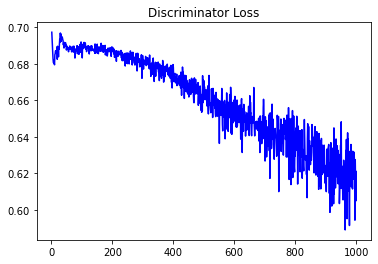

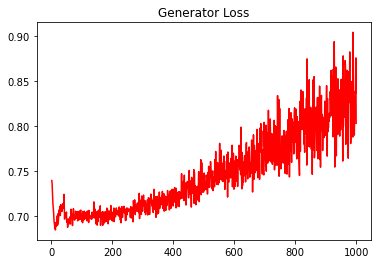

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.5548162804096937


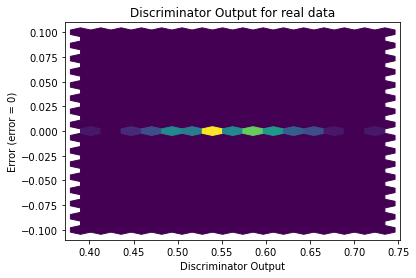

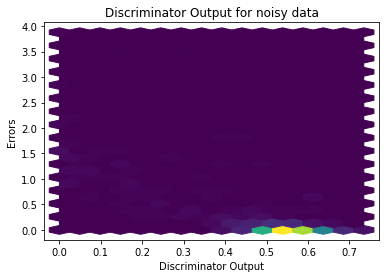

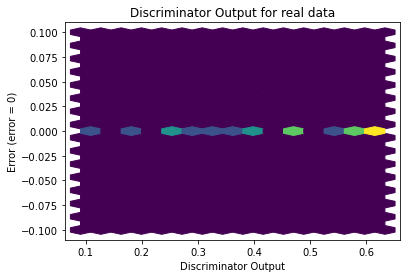

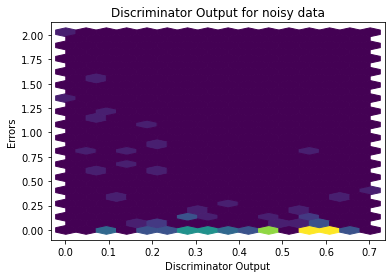

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
# ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [22]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


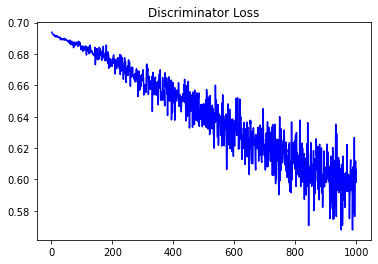

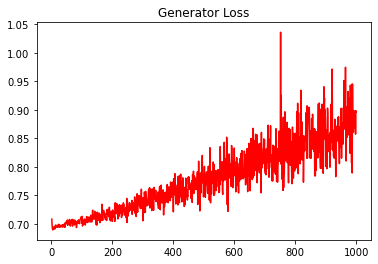

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.34882197811827065


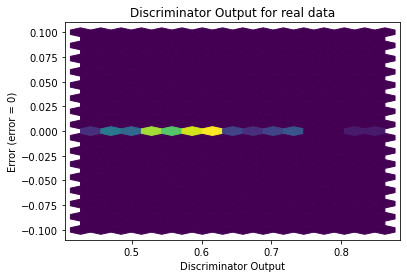

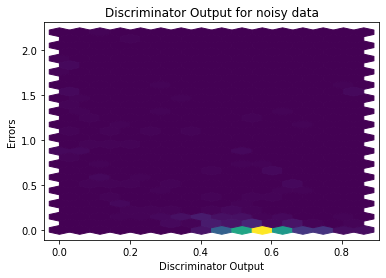

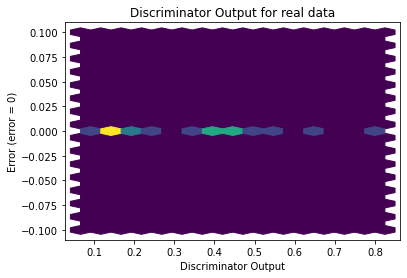

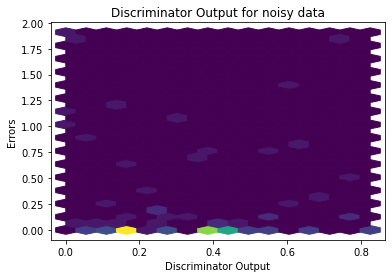

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1562]], requires_grad=True)
